In [2]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
sns.set() # set seaborn to default settings

In [3]:
df = pd.read_csv("citi_page_1.csv")
df.shape # save as tuple(3,24)
df.head()

,Evaluation_Parameters,Global Consumer Banking Net Revenues,Institutional Clients Group Net Revenues,Corporate/Other Net Revenues,$ Total Net Revenues,$ Net Income,Diluted EPS - Net Income,Diluted EPS - Income from Continuing Operations,Assets,Deposits,...,Supplementary Leverage,Return on Assets,Return on Common Equity,Return on Tangible Common Equity,Book Value per Share,Tangible Book Value per Share,Common Shares Outstanding (millions),Total Payout Ratio,Market Capitalization,Direct Staff (thousands)
0,2020,$30.00,$44.30,$0.10,$74.30,$11.00,$4.72,$4.73,"$2,260.00","$1,281.00",...,7.00%,0.50%,5.70%,6.60%,$86.43,$73.67,"$2,082.00",73%,$128,$210
1,2019,$33.00,$39.30,$2.00,$74.30,$19.40,$8.04,$8.04,$1.95,"$1,071.00",...,6.20%,0.98%,10.30%,12.10%,$82.90,$70.39,"$2,114.00",122%,$169,$200
2,2018,$32.30,$38.30,$2.20,$72.90,$18.00,$6.68,$6.69,"$1,917.00","$1,013.00",...,6.40%,0.94%,9.40%,11.00%,$75.05,$63.79,$2.37,109%,$123,$204


In [4]:
#To get the list of all columns
columns = list(df.columns)
columns

['Evaluation_Parameters',
 'Global Consumer Banking Net Revenues',
 'Institutional Clients Group Net Revenues',
 'Corporate/Other Net Revenues',
 '$ Total Net Revenues',
 '$ Net Income',
 'Diluted EPS - Net Income',
 'Diluted EPS - Income from Continuing Operations',
 'Assets',
 'Deposits',
 "Citigroup Stockholders' Equity",
 'Common Equity Tier 1 Capital',
 'Tier 1 Capital',
 'Total Capital',
 'Supplementary Leverage',
 'Return on Assets',
 'Return on Common Equity',
 'Return on Tangible Common Equity',
 'Book Value per Share',
 'Tangible Book Value per Share',
 'Common Shares Outstanding (millions)',
 'Total Payout Ratio',
 'Market Capitalization',
 'Direct Staff (thousands)']

In [5]:
#Identifying data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Evaluation_Parameters                            3 non-null      int64 
 1   Global Consumer Banking Net Revenues             3 non-null      object
 2   Institutional Clients Group Net Revenues         3 non-null      object
 3   Corporate/Other Net Revenues                     3 non-null      object
 4   $ Total Net Revenues                             3 non-null      object
 5   $ Net Income                                     3 non-null      object
 6   Diluted EPS - Net Income                         3 non-null      object
 7   Diluted EPS - Income from Continuing Operations  3 non-null      object
 8   Assets                                           3 non-null      object
 9   Deposits                                       

In [6]:
#removing symbols and converting numeric values to float

df.iloc[:]= df.iloc[:].replace({',':''}, regex = True)
df.iloc[:]= df.iloc[:].replace({'%':''}, regex = True)
df.iloc[:]= df.iloc[:].replace({'\$':''}, regex = True)
df.iloc[:]= df.iloc[:].astype(float)
df['Evaluation_Parameters'] = df['Evaluation_Parameters'].astype(int)
print(df)

   Evaluation_Parameters  Global Consumer Banking Net Revenues  \
0                   2020                                  30.0   
1                   2019                                  33.0   
2                   2018                                  32.3   

   Institutional Clients Group Net Revenues  Corporate/Other Net Revenues  \
0                                      44.3                           0.1   
1                                      39.3                           2.0   
2                                      38.3                           2.2   

   $ Total Net Revenues  $ Net Income  Diluted EPS - Net Income  \
0                  74.3          11.0                      4.72   
1                  74.3          19.4                      8.04   
2                  72.9          18.0                      6.68   

   Diluted EPS - Income from Continuing Operations   Assets  Deposits  ...  \
0                                             4.73  2260.00    1281.0  ...   
1

In [7]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Evaluation_Parameters                            3 non-null      int32  
 1   Global Consumer Banking Net Revenues             3 non-null      float64
 2   Institutional Clients Group Net Revenues         3 non-null      float64
 3   Corporate/Other Net Revenues                     3 non-null      float64
 4   $ Total Net Revenues                             3 non-null      float64
 5   $ Net Income                                     3 non-null      float64
 6   Diluted EPS - Net Income                         3 non-null      float64
 7   Diluted EPS - Income from Continuing Operations  3 non-null      float64
 8   Assets                                           3 non-null      float64
 9   Deposits                            

In [8]:
df.head()

,Evaluation_Parameters,Global Consumer Banking Net Revenues,Institutional Clients Group Net Revenues,Corporate/Other Net Revenues,$ Total Net Revenues,$ Net Income,Diluted EPS - Net Income,Diluted EPS - Income from Continuing Operations,Assets,Deposits,...,Supplementary Leverage,Return on Assets,Return on Common Equity,Return on Tangible Common Equity,Book Value per Share,Tangible Book Value per Share,Common Shares Outstanding (millions),Total Payout Ratio,Market Capitalization,Direct Staff (thousands)
0,2020,30.0,44.3,0.1,74.3,11.0,4.72,4.73,2260.00,1281.0,...,7.0,0.50,5.7,6.6,86.43,73.67,2082.00,73.0,128.0,210.0
1,2019,33.0,39.3,2.0,74.3,19.4,8.04,8.04,1.95,1071.0,...,6.2,0.98,10.3,12.1,82.90,70.39,2114.00,122.0,169.0,200.0
2,2018,32.3,38.3,2.2,72.9,18.0,6.68,6.69,1917.00,1013.0,...,6.4,0.94,9.4,11.0,75.05,63.79,2.37,109.0,123.0,204.0


In [9]:
df.describe().iloc[:, df.columns!='Evaluation_Parameters']

,Global Consumer Banking Net Revenues,Institutional Clients Group Net Revenues,Corporate/Other Net Revenues,$ Total Net Revenues,$ Net Income,Diluted EPS - Net Income,Diluted EPS - Income from Continuing Operations,Assets,Deposits,Citigroup Stockholders' Equity,...,Supplementary Leverage,Return on Assets,Return on Common Equity,Return on Tangible Common Equity,Book Value per Share,Tangible Book Value per Share,Common Shares Outstanding (millions),Total Payout Ratio,Market Capitalization,Direct Staff (thousands)
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,31.766667,40.633333,1.433333,73.833333,16.133333,6.480000,6.486667,1392.983333,1121.666667,196.0,...,6.533333,0.806667,8.466667,9.900000,81.460000,69.283333,1399.456667,101.333333,140.000000,204.666667
std,1.569501,3.214550,1.159023,0.808290,4.500370,1.669012,1.664342,1216.816564,141.001182,3.0,...,0.416333,0.266333,2.437895,2.910326,5.825058,5.032110,1210.018333,25.383722,25.238859,5.033223
min,30.000000,38.300000,0.100000,72.900000,11.000000,4.720000,4.730000,1.950000,1013.000000,193.0,...,6.200000,0.500000,5.700000,6.600000,75.050000,63.790000,2.370000,73.000000,123.000000,200.000000
25%,31.150000,38.800000,1.050000,73.600000,14.500000,5.700000,5.710000,959.475000,1042.000000,194.5,...,6.300000,0.720000,7.550000,8.800000,78.975000,67.090000,1042.185000,91.000000,125.500000,202.000000
50%,32.300000,39.300000,2.000000,74.300000,18.000000,6.680000,6.690000,1917.000000,1071.000000,196.0,...,6.400000,0.940000,9.400000,11.000000,82.900000,70.390000,2082.000000,109.000000,128.000000,204.000000
75%,32.650000,41.800000,2.100000,74.300000,18.700000,7.360000,7.365000,2088.500000,1176.000000,197.5,...,6.700000,0.960000,9.850000,11.550000,84.665000,72.030000,2098.000000,115.500000,148.500000,207.000000
max,33.000000,44.300000,2.200000,74.300000,19.400000,8.040000,8.040000,2260.000000,1281.000000,199.0,...,7.000000,0.980000,10.300000,12.100000,86.430000,73.670000,2114.000000,122.000000,169.000000,210.000000


In [10]:
#Missing Values in our Dataset
df.isnull().sum()

Evaluation_Parameters                              0
Global Consumer Banking Net Revenues               0
Institutional Clients Group Net Revenues           0
Corporate/Other Net Revenues                       0
$ Total Net Revenues                               0
$ Net Income                                       0
Diluted EPS - Net Income                           0
Diluted EPS - Income from Continuing Operations    0
Assets                                             0
Deposits                                           0
Citigroup Stockholders' Equity                     0
Common Equity Tier 1 Capital                       0
Tier 1 Capital                                     0
Total Capital                                      0
Supplementary Leverage                             0
Return on Assets                                   0
Return on Common Equity                            0
Return on Tangible Common Equity                   0
Book Value per Share                          

In [11]:
#total count of unique values for each column

a = pd.DataFrame(df)
a.nunique()

Evaluation_Parameters                              3
Global Consumer Banking Net Revenues               3
Institutional Clients Group Net Revenues           3
Corporate/Other Net Revenues                       3
$ Total Net Revenues                               2
$ Net Income                                       3
Diluted EPS - Net Income                           3
Diluted EPS - Income from Continuing Operations    3
Assets                                             3
Deposits                                           3
Citigroup Stockholders' Equity                     3
Common Equity Tier 1 Capital                       3
Tier 1 Capital                                     2
Total Capital                                      3
Supplementary Leverage                             3
Return on Assets                                   3
Return on Common Equity                            3
Return on Tangible Common Equity                   3
Book Value per Share                          

Text(0.5, 0, 'Year')

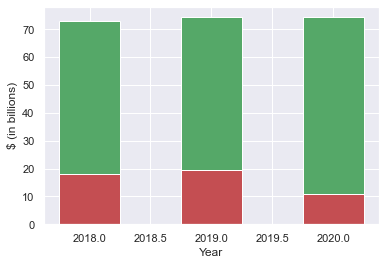

In [12]:
ax = plt.axes()
ax.bar(df.Evaluation_Parameters, df['$ Total Net Revenues'], width=0.5, color='g')
ax.bar(df.Evaluation_Parameters, df['$ Net Income'], width=0.5, color='r')
plt.ylabel('$ (in billions)')
plt.xlabel('Year')

<AxesSubplot:title={'center':'Components of Total Net Revenue'}, xlabel='Evaluation_Parameters', ylabel='$ (in billions)'>

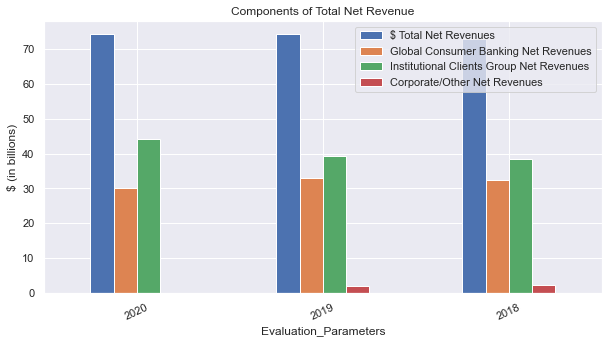

In [13]:
df[['Evaluation_Parameters','$ Total Net Revenues', 'Global Consumer Banking Net Revenues', 'Institutional Clients Group Net Revenues', 'Corporate/Other Net Revenues']].plot(x='Evaluation_Parameters',ylabel = '$ (in billions)',title ='Components of Total Net Revenue', kind='bar', figsize=(10, 5), rot = 25)

<AxesSubplot:xlabel='Evaluation_Parameters'>

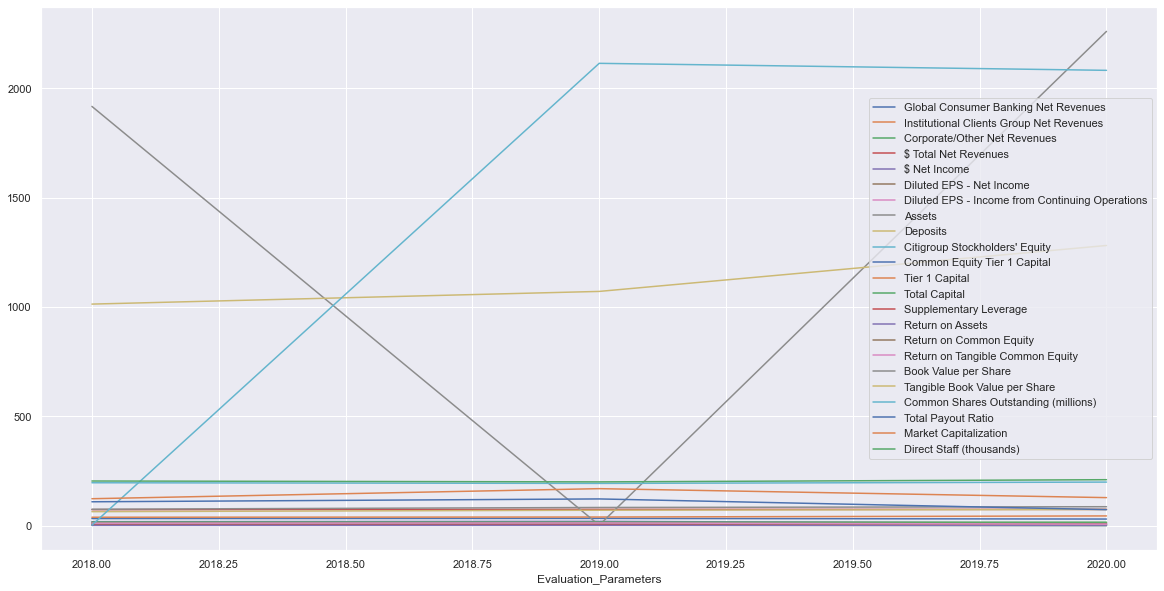

In [14]:
df.plot(figsize=(20,10), x ='Evaluation_Parameters')

#assets drastically decreased in 2019
#common shares outstanding drastically increased in 2019


In [15]:
#Checking if there is any correlaton between Assets and Common shares
df[['Assets', 'Common Shares Outstanding (millions)']].corr() 
#weak correlation identified

,Assets,Common Shares Outstanding (millions)
Assets,1.000000,-0.385186
Common Shares Outstanding (millions),-0.385186,1.000000


In [16]:
df[['$ Total Net Revenues', 'Global Consumer Banking Net Revenues', 'Institutional Clients Group Net Revenues', 'Corporate/Other Net Revenues','$ Net Income']].corr()
#Institutional Clients Group Net Revenues and Corporate/Other Net Revenues are negatively correlated
#Global Consumer Banking Net Revenues and Corporate/Other Net Revenues are highly correlated

,$ Total Net Revenues,Global Consumer Banking Net Revenues,Institutional Clients Group Net Revenues,Corporate/Other Net Revenues,$ Net Income
$ Total Net Revenues,1.000000,-0.294285,0.628619,-0.572856,-0.359211
Global Consumer Banking Net Revenues,-0.294285,1.000000,-0.928268,0.951943,0.997640
Institutional Clients Group Net Revenues,0.628619,-0.928268,1.000000,-0.997566,-0.951613
Corporate/Other Net Revenues,-0.572856,0.951943,-0.997566,1.000000,0.970725
$ Net Income,-0.359211,0.997640,-0.951613,0.970725,1.000000


<AxesSubplot:>

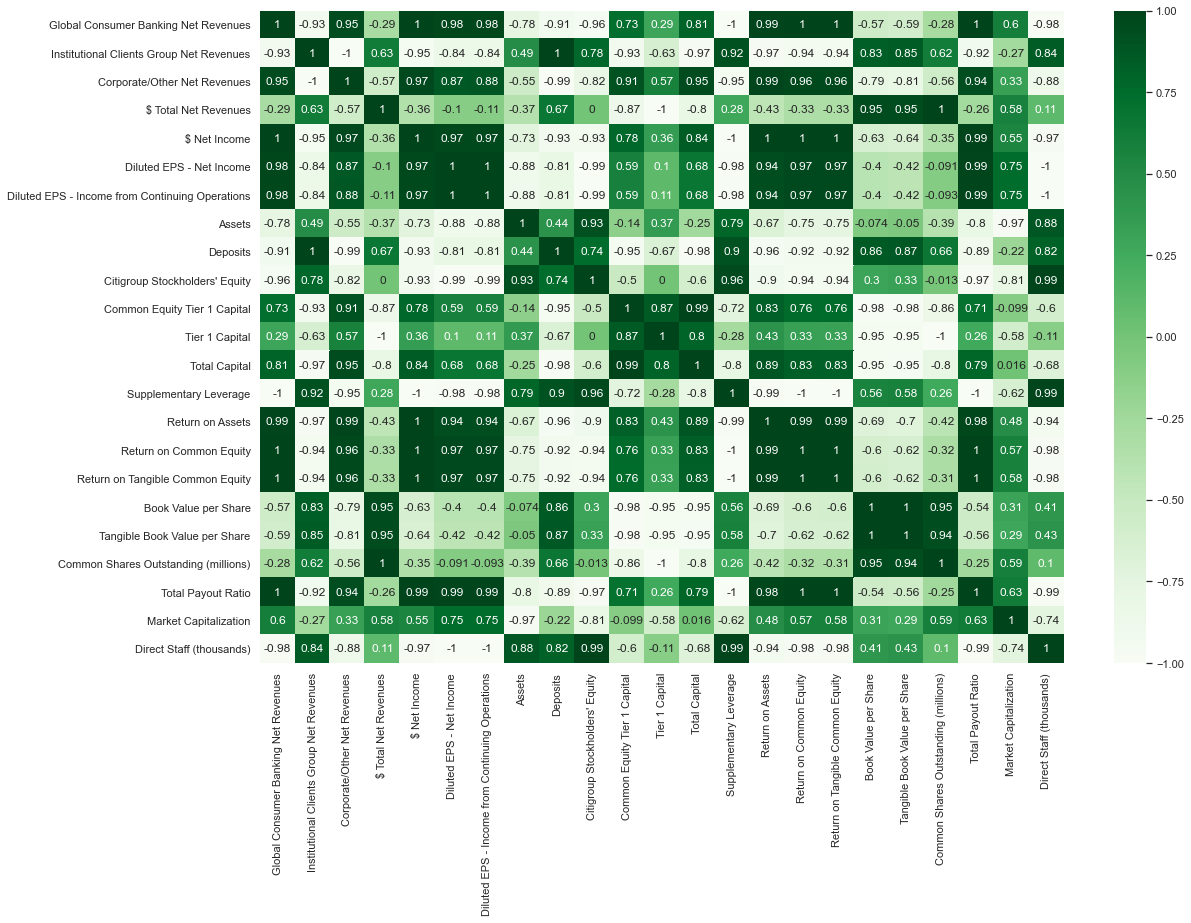

In [30]:
#analyzing Correlations

correlation_mat = df.iloc[:, df.columns!='Evaluation_Parameters']
corr = correlation_mat.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap="Greens",annot=True)

In [31]:
#unstacking the correlations

corr_pairs = corr.unstack()

print(corr_pairs)

Global Consumer Banking Net Revenues  Global Consumer Banking Net Revenues        1.000000
                                      Institutional Clients Group Net Revenues   -0.928268
                                      Corporate/Other Net Revenues                0.951943
                                      $ Total Net Revenues                       -0.294285
                                      $ Net Income                                0.997640
                                                                                    ...   
Direct Staff (thousands)              Tangible Book Value per Share               0.432201
                                      Common Shares Outstanding (millions)        0.101562
                                      Total Payout Ratio                         -0.988818
                                      Market Capitalization                      -0.739966
                                      Direct Staff (thousands)                    1.000000

In [32]:
#Sorting the Correlation values

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Tier 1 Capital                                   $ Total Net Revenues                              -1.00000
$ Total Net Revenues                             Tier 1 Capital                                    -1.00000
Diluted EPS - Income from Continuing Operations  Direct Staff (thousands)                          -0.99996
Direct Staff (thousands)                         Diluted EPS - Income from Continuing Operations   -0.99996
                                                 Diluted EPS - Net Income                          -0.99994
                                                                                                     ...   
Book Value per Share                             Book Value per Share                               1.00000
Tangible Book Value per Share                    Tangible Book Value per Share                      1.00000
Common Shares Outstanding (millions)             Common Shares Outstanding (millions)               1.00000
Common Equity Tier 1 Capital

In [33]:
#Selecting Negative Pairs

negative_pairs = sorted_pairs[sorted_pairs < 0]

print(negative_pairs)

Tier 1 Capital                                   $ Total Net Revenues                              -1.000000
$ Total Net Revenues                             Tier 1 Capital                                    -1.000000
Diluted EPS - Income from Continuing Operations  Direct Staff (thousands)                          -0.999960
Direct Staff (thousands)                         Diluted EPS - Income from Continuing Operations   -0.999960
                                                 Diluted EPS - Net Income                          -0.999940
                                                                                                      ...   
Assets                                           Book Value per Share                              -0.074278
                                                 Tangible Book Value per Share                     -0.050194
Tangible Book Value per Share                    Assets                                            -0.050194
Citigroup Stockhold

In [35]:
#Selecting Strong Correlated pairs

strong_pairs = sorted_pairs[sorted_pairs> 0.9]

print(strong_pairs)

Supplementary Leverage                Deposits                                    0.900571
Deposits                              Supplementary Leverage                      0.900571
Common Equity Tier 1 Capital          Corporate/Other Net Revenues                0.905936
Corporate/Other Net Revenues          Common Equity Tier 1 Capital                0.905936
Supplementary Leverage                Institutional Clients Group Net Revenues    0.921551
                                                                                    ...   
Book Value per Share                  Book Value per Share                        1.000000
Tangible Book Value per Share         Tangible Book Value per Share               1.000000
Common Shares Outstanding (millions)  Common Shares Outstanding (millions)        1.000000
Common Equity Tier 1 Capital          Common Equity Tier 1 Capital                1.000000
Direct Staff (thousands)              Direct Staff (thousands)                    1.000000